In [1]:
import sys
# на уровень выше из research_rank/
sys.path.insert(0, '..')
from pathlib import Path
import numpy as np
import pandas as pd
import json
from collections import defaultdict
from plot_json import convert_dictlist_to_matrix
import matplotlib.pyplot as plt

### Рассмотрим собственные значения $\rho_{max}$ и $\rho_{min}$ при взятии различных рангов при томографии на основе протокола Фёдорова

Изучим ранг состояний ро_макс и ро_мин. Для начала рассмотрим это для протокола Фёдорова. Рассмотрим 500 различных квантовых состояний с разными рангами с точностью $\epsilon = 10^{-6}$

Для томографии состояния с рангом 1 создадим таблицу df_r_1

In [100]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*

protocol = [Gl_2(pi / 8) @ Gl_8(0), Gl_2(pi / 8), np.diag((1,1,1)), Gl_4(pi / 8)]
tomography_1 = ACT(protocol, 1, 3)

N = 500
svx_list = []         
rho_max_list = [0] * N
rho_min_list = [0] * N

# СЗ - собственное значение, И - измерение (количество используемых элементов протокола)
fed_r1 = {
    "СЗ 1, И 1": [],
    "СЗ 2, И 1": [],
    "СЗ 3, И 1": []
}


# Создание DataFrame
df_r_1_max = pd.DataFrame(fed_r1)
df_r_1_max[""] = np.nan
df_r_1_max["СЗ 1, И 2"] = []
df_r_1_max["СЗ 2, И 2"] = []
df_r_1_max["СЗ 3, И 2"] = []
df_r_1_max[" "] = np.nan
df_r_1_max["СЗ 1, И 3"] = []
df_r_1_max["СЗ 2, И 3"] = []
df_r_1_max["СЗ 3, И 3"] = []
df_r_1_max["  "] = np.nan
df_r_1_max["СЗ 1, И 4"] = []
df_r_1_max["СЗ 2, И 4"] = []
df_r_1_max["СЗ 3, И 4"] = []

df_r_1_min = pd.DataFrame(fed_r1)
df_r_1_min[""] = np.nan
df_r_1_min["СЗ 1, И 2"] = []
df_r_1_min["СЗ 2, И 2"] = []
df_r_1_min["СЗ 3, И 2"] = []
df_r_1_min[" "] = np.nan
df_r_1_min["СЗ 1, И 3"] = []
df_r_1_min["СЗ 2, И 3"] = []
df_r_1_min["СЗ 3, И 3"] = []
df_r_1_min["  "] = np.nan
df_r_1_min["СЗ 1, И 4"] = []
df_r_1_min["СЗ 2, И 4"] = []
df_r_1_min["СЗ 3, И 4"] = []

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
        x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=1, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
        eigenvalues, eigenvectors = np.linalg.eig(x_min_list[ind_min])
        match ind_min:
            case 0:
                df_r_1_min.loc[len(df_r_1_min), ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 1:
                df_r_1_min.loc[len(df_r_1_min)-1, ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 2:
                df_r_1_min.loc[len(df_r_1_min)-1, ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 3:
                df_r_1_min.loc[len(df_r_1_min)-1, ["СЗ 1, И 4", "СЗ 2, И 4", "СЗ 3, И 4"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])

    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
        eigenvalues, eigenvectors = np.linalg.eig(x_max_list[ind_max])
        match ind_max:
            case 0:
                df_r_1_max.loc[len(df_r_1_max), ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 1:
                df_r_1_max.loc[len(df_r_1_max)-1, ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 2:
                df_r_1_max.loc[len(df_r_1_max)-1, ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 3:
                df_r_1_max.loc[len(df_r_1_max)-1, ["СЗ 1, И 4", "СЗ 2, И 4", "СЗ 3, И 4"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])


100%|██████████| 500/500 [07:47<00:00,  1.07it/s]  


Для томографии состояния с рангом 3 создадим таблицу df_r_3

In [113]:
protocol = [Gl_2(pi / 8) @ Gl_8(0), Gl_2(pi / 8), np.diag((1,1,1)), Gl_4(pi / 8)]
tomography = ACT(protocol, 1, 3)
x = np.array([1, 2, 3])
N = 500
svx_list = []         
rho_max_list = [0] * N
rho_min_list = [0] * N


fed_r3 = {
    "СЗ 1, И 1": [],
    "СЗ 2, И 1": [],
    "СЗ 3, И 1": []
}

# Создание DataFrame
df_r_3_max = pd.DataFrame(fed_r3)
df_r_3_max[""] = np.nan
df_r_3_max["СЗ 1, И 2"] = []
df_r_3_max["СЗ 2, И 2"] = []
df_r_3_max["СЗ 3, И 2"] = []
df_r_3_max[" "] = np.nan
df_r_3_max["СЗ 1, И 3"] = []
df_r_3_max["СЗ 2, И 3"] = []
df_r_3_max["СЗ 3, И 3"] = []

df_r_3_min = pd.DataFrame(fed_r1)
df_r_3_min[""] = np.nan
df_r_3_min["СЗ 1, И 2"] = []
df_r_3_min["СЗ 2, И 2"] = []
df_r_3_min["СЗ 3, И 2"] = []
df_r_3_min[" "] = np.nan
df_r_3_min["СЗ 1, И 3"] = []
df_r_3_min["СЗ 2, И 3"] = []
df_r_3_min["СЗ 3, И 3"] = []

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography.main(rank_psevdoin=3, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                       max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
        eigenvalues, eigenvectors = np.linalg.eig(x_min_list[ind_min])
        match ind_min:
            case 0:
                df_r_3_min.loc[len(df_r_3_min), ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 1:
                df_r_3_min.loc[len(df_r_3_min)-1, ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 2:
                df_r_3_min.loc[len(df_r_3_min)-1, ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 3:
                df_r_3_min.loc[len(df_r_3_min)-1, ["СЗ 1, И 4", "СЗ 2, И 4", "СЗ 3, И 4"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])

    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
        eigenvalues, eigenvectors = np.linalg.eig(x_max_list[ind_max])
        match ind_max:
            case 0:
                df_r_3_max.loc[len(df_r_3_max), ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 1:
                df_r_3_max.loc[len(df_r_3_max)-1, ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 2:
                df_r_3_max.loc[len(df_r_3_max)-1, ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 3:
                df_r_3_max.loc[len(df_r_3_max)-1, ["СЗ 1, И 4", "СЗ 2, И 4", "СЗ 3, И 4"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])


100%|██████████| 500/500 [03:53<00:00,  2.14it/s]


Объединяем их в одну таблицу exel под названием fed_eigenval_r_or_n

In [ ]:
# # Создаем пустые столбцы (3 штуки)
# empty_cols = pd.DataFrame(np.nan, index=df_r_1_min.index, columns=['   ', '    ', '  '])

# # Объединяем таблицы с пустыми столбцами между ними
# result = pd.concat([df_r_1_min, empty_cols, df_r_3_min], axis=1)

# # Запись в Excel
# result.to_excel("exel_file/fed_eigenval_r_or_n_min.xlsx", index=False, startrow=2)

# # Объединяем таблицы с пустыми столбцами между ними
# result = pd.concat([df_r_1_max, empty_cols, df_r_3_max], axis=1)

# # Запись в Excel
# result.to_excel("exel_file/fed_eigenval_r_or_n_max.xlsx", index=False, startrow=2)

#### Строим графики с этими собственными значениями

Для ранга 1

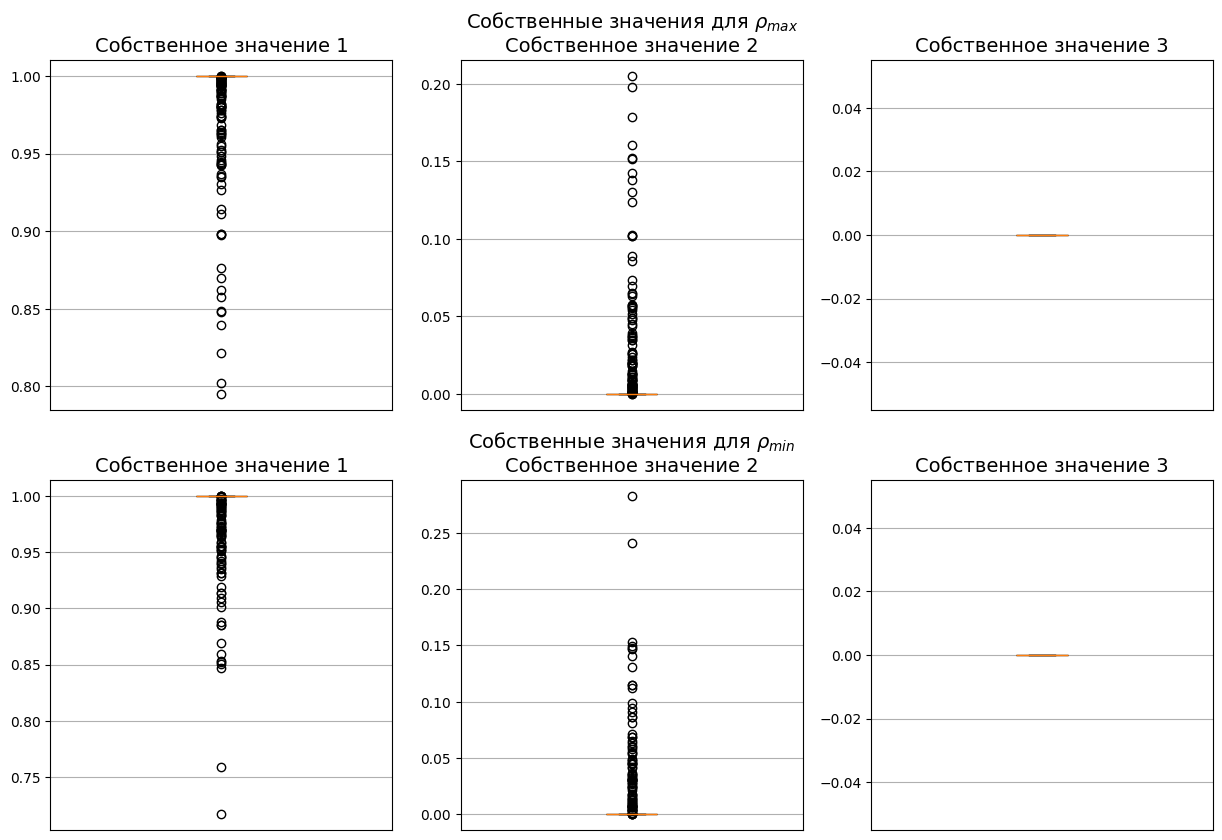

In [118]:
# Группируем колонки по измерениям (столбцы)
column_groups = [
    ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"],  # Измерение 1
    ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"],  # Измерение 2
    ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"],   # Измерение 3
    ["СЗ 1, И 4", "СЗ 2, И 4", "СЗ 3, И 4"]   # Измерение 4
]

col_labels = ["СЗ 1", "СЗ 2", "СЗ 3"]
row_labels = ["Измерение 1", "Измерение 2", "Измерение 3", "Измерение 4"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

i = 1
for j in range(3):  # по СЗ (столбцы)
    ax = axes[0][j]
    col_name = column_groups[i][j]
    data = df_r_1_max[col_name].dropna()

    ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    
    # Заголовок для каждого графика — только название СЗ
    ax.set_title(f"Собственное значение {col_labels[j][3]}", fontsize=14)
    
    # Для центрального графика в строке (j == 1) добавляем подпись с измерением
    if j == 1:
        ax.set_title(r"Собственные значения для $\rho_{max}$" + f"\nСобственное значение {col_labels[j][3]}", fontsize=14)

    ax.grid(True)
    ax.set_xticks([])

for j in range(3):  # по СЗ (столбцы)
    ax = axes[1][j]
    col_name = column_groups[i][j]
    data = df_r_1_min[col_name].dropna()

    ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    
    # Заголовок для каждого графика — только название СЗ
    ax.set_title(f"Собственное значение {col_labels[j][3]}", fontsize=14)
    
    # Для центрального графика в строке (j == 1) добавляем подпись с измерением
    if j == 1:
        ax.set_title(r"Собственные значения для $\rho_{min}$" + f"\nСобственное значение {col_labels[j][3]}", fontsize=14)

    ax.grid(True)
    ax.set_xticks([])

plt.show()


Для ранга 3

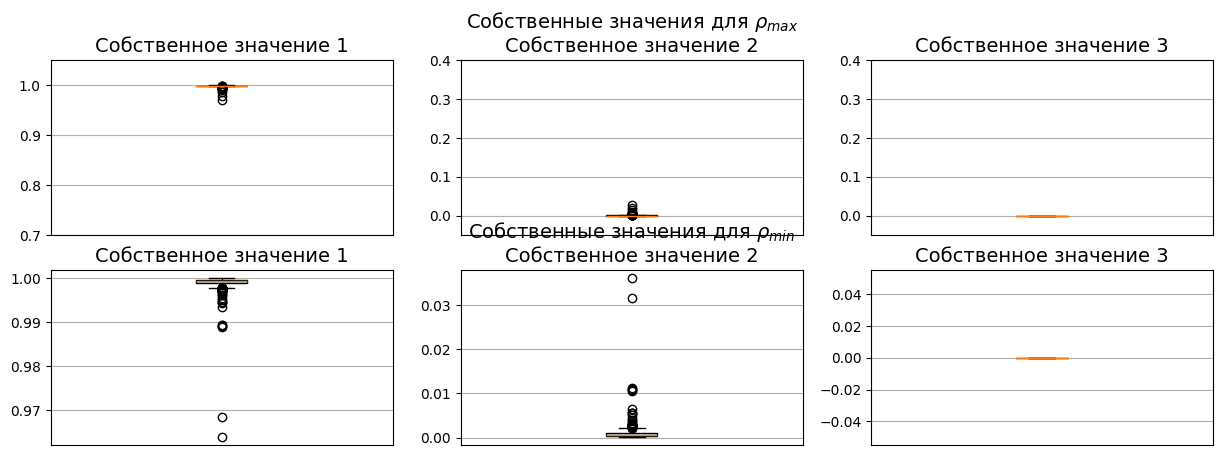

In [116]:
# Группируем колонки по измерениям (столбцы)
column_groups = [
    ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"],  # Измерение 1
    ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"],  # Измерение 2
    ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"],   # Измерение 3
    ["СЗ 1, И 4", "СЗ 2, И 4", "СЗ 3, И 4"]   # Измерение 4
]

col_labels = ["СЗ 1", "СЗ 2", "СЗ 3"]
row_labels = ["Измерение 1", "Измерение 2", "Измерение 3", "Измерение 4"]

fig, axes = plt.subplots(2, 3, figsize=(15, 5))

i = 3
for j in range(3):  # по СЗ (столбцы)
    ax = axes[0][j]
    col_name = column_groups[i][j]
    data = df_r_3_max[col_name].dropna()

    ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))

    # Заголовок для каждого графика — только название СЗ
    ax.set_title(f"Собственное значение {col_labels[j][3]}", fontsize=14)
    # Для центрального графика в строке (j == 1) добавляем подпись с измерением
    if j == 1:
        ax.set_title(r"Собственные значения для $\rho_{max}$" + f"\nСобственное значение {col_labels[j][3]}", fontsize=14)
        

    if j == 0:
        ax.set_ylim([0.7, 1.05])
    else:
        ax.set_ylim([-0.05, 0.4])


    ax.grid(True)
    ax.set_xticks([])

for j in range(3):  # по СЗ (столбцы)
    ax = axes[1][j]
    col_name = column_groups[i][j]
    data = df_r_3_min[col_name].dropna()

    ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))

    # Заголовок для каждого графика — только название СЗ
    ax.set_title(f"Собственное значение {col_labels[j][3]}", fontsize=14)
    # Для центрального графика в строке (j == 1) добавляем подпись с измерением
    if j == 1:
        ax.set_title(r"Собственные значения для $\rho_{min}$" + f"\nСобственное значение {col_labels[j][3]}", fontsize=14)

    ax.grid(True)
    ax.set_xticks([])


plt.show()

### Рассмотрим собственные значения $\rho_{max}$ и $\rho_{min}$ на основе протокола с пластинкой $\frac{\lambda}{4}$

Изучим ранг состояний ро_макс и ро_мин. Для начала рассмотрим это для протокола Фёдорова. Рассмотрим 500 различных квантовых состояний с разными рангами с точностью $\epsilon = 10^{-6}$

Для томографии состояния с рангом 1 создадим таблицу df_start_protocol_r_1

In [ ]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*

protocol = [Gl_4(0), Gl_4(pi / 8), Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8)]
rank = 1
tomography_1 = ACT(protocol, rank, 3)

N = 500
svx_list = []         
rho_max_list = [0] * N
rho_min_list = [0] * N

# СЗ - собственное значение, И - измерение (количество используемых элементов протокола)
fed_r1 = {
    "СЗ 1, И 1": [],
    "СЗ 2, И 1": [],
    "СЗ 3, И 1": []
}


# Создание DataFrame
df_start_protocol_r_1_max = pd.DataFrame(fed_r1)
df_start_protocol_r_1_max[""] = np.nan
df_start_protocol_r_1_max["СЗ 1, И 2"] = []
df_start_protocol_r_1_max["СЗ 2, И 2"] = []
df_start_protocol_r_1_max["СЗ 3, И 2"] = []
df_start_protocol_r_1_max[" "] = np.nan
df_start_protocol_r_1_max["СЗ 1, И 3"] = []
df_start_protocol_r_1_max["СЗ 2, И 3"] = []
df_start_protocol_r_1_max["СЗ 3, И 3"] = []
df_start_protocol_r_1_max["  "] = np.nan
df_start_protocol_r_1_max["СЗ 1, И 4"] = []
df_start_protocol_r_1_max["СЗ 2, И 4"] = []
df_start_protocol_r_1_max["СЗ 3, И 4"] = []
df_start_protocol_r_1_max["   "] = np.nan
df_start_protocol_r_1_max["СЗ 1, И 5"] = []
df_start_protocol_r_1_max["СЗ 2, И 5"] = []
df_start_protocol_r_1_max["СЗ 3, И 5"] = []

df_start_protocol_r_1_min = pd.DataFrame(fed_r1)
df_start_protocol_r_1_min[""] = np.nan
df_start_protocol_r_1_min["СЗ 1, И 2"] = []
df_start_protocol_r_1_min["СЗ 2, И 2"] = []
df_start_protocol_r_1_min["СЗ 3, И 2"] = []
df_start_protocol_r_1_min[" "] = np.nan
df_start_protocol_r_1_min["СЗ 1, И 3"] = []
df_start_protocol_r_1_min["СЗ 2, И 3"] = []
df_start_protocol_r_1_min["СЗ 3, И 3"] = []
df_start_protocol_r_1_min["  "] = np.nan
df_start_protocol_r_1_min["СЗ 1, И 4"] = []
df_start_protocol_r_1_min["СЗ 2, И 4"] = []
df_start_protocol_r_1_min["СЗ 3, И 4"] = []
df_start_protocol_r_1_min["   "] = np.nan
df_start_protocol_r_1_min["СЗ 1, И 5"] = []
df_start_protocol_r_1_min["СЗ 2, И 5"] = []
df_start_protocol_r_1_min["СЗ 3, И 5"] = []

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
        x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
        eigenvalues_min, eigenvectors_min = np.linalg.eig(x_min_list[ind_min])
        match ind_min:
            case 0:
                df_start_protocol_r_1_min.loc[len(df_start_protocol_r_1_min), ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"]] = (np.round(np.sort(np.real(eigenvalues_min)), 5)[::-1])
            case 1:
                df_start_protocol_r_1_min.loc[len(df_start_protocol_r_1_min)-1, ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"]] = (np.round(np.sort(np.real(eigenvalues_min)), 5)[::-1])
            case 2:
                df_start_protocol_r_1_min.loc[len(df_start_protocol_r_1_min)-1, ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]] = (np.round(np.sort(np.real(eigenvalues_min)), 5)[::-1])
            case 3:
                df_start_protocol_r_1_min.loc[len(df_start_protocol_r_1_min)-1, ["СЗ 1, И 4", "СЗ 2, И 4", "СЗ 3, И 4"]] = (np.round(np.sort(np.real(eigenvalues_min)), 5)[::-1])
            case 4:
                df_start_protocol_r_1_min.loc[len(df_start_protocol_r_1_min)-1, ["СЗ 1, И 5", "СЗ 2, И 5", "СЗ 3, И 5"]] = (np.round(np.sort(np.real(eigenvalues_min)), 5)[::-1])

    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
        eigenvalues_max, eigenvectors_max = np.linalg.eig(x_max_list[ind_max])
        match ind_max:
            case 0:
                df_start_protocol_r_1_max.loc[len(df_start_protocol_r_1_max), ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"]] = (np.round(np.sort(np.real(eigenvalues_max)), 5)[::-1])
            case 1:
                df_start_protocol_r_1_max.loc[len(df_start_protocol_r_1_max)-1, ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"]] = (np.round(np.sort(np.real(eigenvalues_max)), 5)[::-1])
            case 2:
                df_start_protocol_r_1_max.loc[len(df_start_protocol_r_1_max)-1, ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]] = (np.round(np.sort(np.real(eigenvalues_max)), 5)[::-1])
            case 3:
                df_start_protocol_r_1_max.loc[len(df_start_protocol_r_1_max)-1, ["СЗ 1, И 4", "СЗ 2, И 4", "СЗ 3, И 4"]] = (np.round(np.sort(np.real(eigenvalues_max)), 5)[::-1])
            case 4:
                df_start_protocol_r_1_max.loc[len(df_start_protocol_r_1_max)-1, ["СЗ 1, И 5", "СЗ 2, И 5", "СЗ 3, И 5"]] = (np.round(np.sort(np.real(eigenvalues_max)), 5)[::-1])

100%|██████████| 500/500 [1:20:45<00:00,  9.69s/it]


Для томографии состояния с рангом 2 создадим таблицу df_start_protocol_r_2

In [ ]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*

protocol = [Gl_4(0), Gl_4(pi / 8), Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8)]
rank = 2
tomography_1 = ACT(protocol, rank, 3)

N = 500
svx_list = []         
rho_max_list = [0] * N
rho_min_list = [0] * N

# СЗ - собственное значение, И - измерение (количество используемых элементов протокола)
fed_r2 = {
    "СЗ 1, И 1": [],
    "СЗ 2, И 1": [],
    "СЗ 3, И 1": []
}


# Создание DataFrame
df_start_protocol_r_2_max = pd.DataFrame(fed_r2)
df_start_protocol_r_2_max[""] = np.nan
df_start_protocol_r_2_max["СЗ 1, И 2"] = []
df_start_protocol_r_2_max["СЗ 2, И 2"] = []
df_start_protocol_r_2_max["СЗ 3, И 2"] = []
df_start_protocol_r_2_max[" "] = np.nan
df_start_protocol_r_2_max["СЗ 1, И 3"] = []
df_start_protocol_r_2_max["СЗ 2, И 3"] = []
df_start_protocol_r_2_max["СЗ 3, И 3"] = []
df_start_protocol_r_2_max["  "] = np.nan
df_start_protocol_r_2_max["СЗ 1, И 4"] = []
df_start_protocol_r_2_max["СЗ 2, И 4"] = []
df_start_protocol_r_2_max["СЗ 3, И 4"] = []
df_start_protocol_r_2_max["   "] = np.nan
df_start_protocol_r_2_max["СЗ 1, И 5"] = []
df_start_protocol_r_2_max["СЗ 2, И 5"] = []
df_start_protocol_r_2_max["СЗ 3, И 5"] = []

df_start_protocol_r_2_min = pd.DataFrame(fed_r2)
df_start_protocol_r_2_min[""] = np.nan
df_start_protocol_r_2_min["СЗ 1, И 2"] = []
df_start_protocol_r_2_min["СЗ 2, И 2"] = []
df_start_protocol_r_2_min["СЗ 3, И 2"] = []
df_start_protocol_r_2_min[" "] = np.nan
df_start_protocol_r_2_min["СЗ 1, И 3"] = []
df_start_protocol_r_2_min["СЗ 2, И 3"] = []
df_start_protocol_r_2_min["СЗ 3, И 3"] = []
df_start_protocol_r_2_min["  "] = np.nan
df_start_protocol_r_2_min["СЗ 1, И 4"] = []
df_start_protocol_r_2_min["СЗ 2, И 4"] = []
df_start_protocol_r_2_min["СЗ 3, И 4"] = []
df_start_protocol_r_2_min["   "] = np.nan
df_start_protocol_r_2_min["СЗ 1, И 5"] = []
df_start_protocol_r_2_min["СЗ 2, И 5"] = []
df_start_protocol_r_2_min["СЗ 3, И 5"] = []

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
        x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
        eigenvalues_min, eigenvectors_min = np.linalg.eig(x_min_list[ind_min])
        match ind_min:
            case 0:
                df_start_protocol_r_2_min.loc[len(df_start_protocol_r_2_min), ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"]] = (np.round(np.sort(np.real(eigenvalues_min)), 5)[::-1])
            case 1:
                df_start_protocol_r_2_min.loc[len(df_start_protocol_r_2_min)-1, ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"]] = (np.round(np.sort(np.real(eigenvalues_min)), 5)[::-1])
            case 2:
                df_start_protocol_r_2_min.loc[len(df_start_protocol_r_2_min)-1, ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]] = (np.round(np.sort(np.real(eigenvalues_min)), 5)[::-1])
            case 3:
                df_start_protocol_r_2_min.loc[len(df_start_protocol_r_2_min)-1, ["СЗ 1, И 4", "СЗ 2, И 4", "СЗ 3, И 4"]] = (np.round(np.sort(np.real(eigenvalues_min)), 5)[::-1])
            case 4:
                df_start_protocol_r_2_min.loc[len(df_start_protocol_r_2_min)-1, ["СЗ 1, И 5", "СЗ 2, И 5", "СЗ 3, И 5"]] = (np.round(np.sort(np.real(eigenvalues_min)), 5)[::-1])

    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
        eigenvalues, eigenvectors = np.linalg.eig(x_max_list[ind_max])
        match ind_max:
            case 0:
                df_start_protocol_r_2_max.loc[len(df_start_protocol_r_2_max), ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 1:
                df_start_protocol_r_2_max.loc[len(df_start_protocol_r_2_max)-1, ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 2:
                df_start_protocol_r_2_max.loc[len(df_start_protocol_r_2_max)-1, ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 3:
                df_start_protocol_r_2_max.loc[len(df_start_protocol_r_2_max)-1, ["СЗ 1, И 4", "СЗ 2, И 4", "СЗ 3, И 4"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 4:
                df_start_protocol_r_2_max.loc[len(df_start_protocol_r_2_max)-1, ["СЗ 1, И 5", "СЗ 2, И 5", "СЗ 3, И 5"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])

100%|██████████| 500/500 [1:18:33<00:00,  9.43s/it]


Для томографии состояния с рангом 3 создадим таблицу df_start_protocol_r_3

In [55]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*

protocol = [Gl_4(0), Gl_4(pi / 8), Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8)]
rank = 3
tomography_1 = ACT(protocol, rank, 3)

N = 500
svx_list = []         
rho_max_list = [0] * N
rho_min_list = [0] * N

# СЗ - собственное значение, И - измерение (количество используемых элементов протокола)
fed_r3 = {
    "СЗ 1, И 1": [],
    "СЗ 2, И 1": [],
    "СЗ 3, И 1": []
}


# Создание DataFrame
df_start_protocol_r_3_max = pd.DataFrame(fed_r3)
df_start_protocol_r_3_max[""] = np.nan
df_start_protocol_r_3_max["СЗ 1, И 2"] = []
df_start_protocol_r_3_max["СЗ 2, И 2"] = []
df_start_protocol_r_3_max["СЗ 3, И 2"] = []
df_start_protocol_r_3_max[" "] = np.nan
df_start_protocol_r_3_max["СЗ 1, И 3"] = []
df_start_protocol_r_3_max["СЗ 2, И 3"] = []
df_start_protocol_r_3_max["СЗ 3, И 3"] = []
df_start_protocol_r_3_max["  "] = np.nan
df_start_protocol_r_3_max["СЗ 1, И 4"] = []
df_start_protocol_r_3_max["СЗ 2, И 4"] = []
df_start_protocol_r_3_max["СЗ 3, И 4"] = []
df_start_protocol_r_3_max["   "] = np.nan
df_start_protocol_r_3_max["СЗ 1, И 5"] = []
df_start_protocol_r_3_max["СЗ 2, И 5"] = []
df_start_protocol_r_3_max["СЗ 3, И 5"] = []

df_start_protocol_r_3_min = pd.DataFrame(fed_r3)
df_start_protocol_r_3_min[""] = np.nan
df_start_protocol_r_3_min["СЗ 1, И 2"] = []
df_start_protocol_r_3_min["СЗ 2, И 2"] = []
df_start_protocol_r_3_min["СЗ 3, И 2"] = []
df_start_protocol_r_3_min[" "] = np.nan
df_start_protocol_r_3_min["СЗ 1, И 3"] = []
df_start_protocol_r_3_min["СЗ 2, И 3"] = []
df_start_protocol_r_3_min["СЗ 3, И 3"] = []
df_start_protocol_r_3_min["  "] = np.nan
df_start_protocol_r_3_min["СЗ 1, И 4"] = []
df_start_protocol_r_3_min["СЗ 2, И 4"] = []
df_start_protocol_r_3_min["СЗ 3, И 4"] = []
df_start_protocol_r_3_min["   "] = np.nan
df_start_protocol_r_3_min["СЗ 1, И 5"] = []
df_start_protocol_r_3_min["СЗ 2, И 5"] = []
df_start_protocol_r_3_min["СЗ 3, И 5"] = []

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
        x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
        eigenvalues, eigenvectors = np.linalg.eig(x_min_list[ind_min])
        match ind_min:
            case 0:
                df_start_protocol_r_3_min.loc[len(df_start_protocol_r_3_min), ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 1:
                df_start_protocol_r_3_min.loc[len(df_start_protocol_r_3_min)-1, ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 2:
                df_start_protocol_r_3_min.loc[len(df_start_protocol_r_3_min)-1, ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 3:
                df_start_protocol_r_3_min.loc[len(df_start_protocol_r_3_min)-1, ["СЗ 1, И 4", "СЗ 2, И 4", "СЗ 3, И 4"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 4:
                df_start_protocol_r_3_min.loc[len(df_start_protocol_r_3_min)-1, ["СЗ 1, И 5", "СЗ 2, И 5", "СЗ 3, И 5"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
        eigenvalues, eigenvectors = np.linalg.eig(x_max_list[ind_max])
        match ind_max:
            case 0:
                df_start_protocol_r_3_max.loc[len(df_start_protocol_r_3_max), ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 1:
                df_start_protocol_r_3_max.loc[len(df_start_protocol_r_3_max)-1, ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 2:
                df_start_protocol_r_3_max.loc[len(df_start_protocol_r_3_max)-1, ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 3:
                df_start_protocol_r_3_max.loc[len(df_start_protocol_r_3_max)-1, ["СЗ 1, И 4", "СЗ 2, И 4", "СЗ 3, И 4"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])
            case 4:
                df_start_protocol_r_3_max.loc[len(df_start_protocol_r_3_max)-1, ["СЗ 1, И 5", "СЗ 2, И 5", "СЗ 3, И 5"]] = (np.round(np.sort(np.real(eigenvalues)), 5)[::-1])

100%|██████████| 500/500 [04:29<00:00,  1.85it/s]


Объединяем их в одну таблицу exel под названием start_protocol_eigenval_r

In [ ]:
# # Создаем пустые столбцы (3 штуки)
# empty_cols = pd.DataFrame(np.nan, index=df_start_protocol_r_1_max.index, columns=['   ', '    ', '  '])

# # Объединяем таблицы с пустыми столбцами между ними
# result = pd.concat([df_start_protocol_r_1_max, empty_cols, df_start_protocol_r_2_max, empty_cols, df_start_protocol_r_3_max], axis=1)

# # Запись в Excel
# result.to_excel("exel_file/start_protocol_eigenval_r_max.xlsx", index=False, startrow=2)

# # Объединяем таблицы с пустыми столбцами между ними
# result = pd.concat([df_start_protocol_r_1_min, empty_cols, df_start_protocol_r_2_min, empty_cols, df_start_protocol_r_3_min], axis=1)

# # Запись в Excel
# result.to_excel("exel_file/start_protocol_eigenval_r_min.xlsx", index=False, startrow=2)

#### Строим графики с этими собственными значениями

Для ранга 1

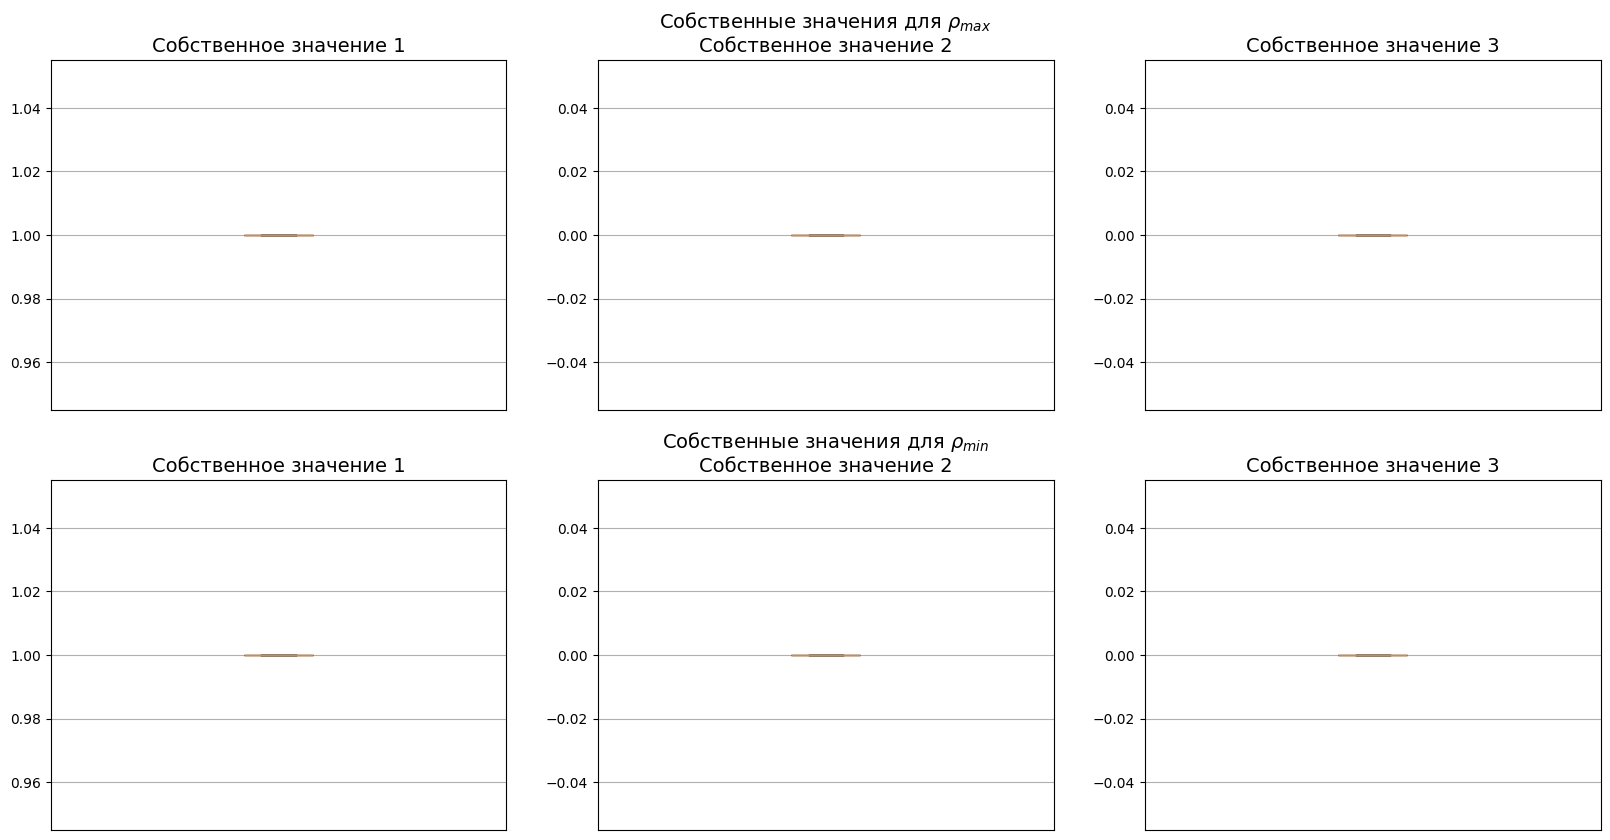

In [122]:
# Группируем колонки по измерениям (столбцы)
column_groups = [
    ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"],  # Измерение 1
    ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"],  # Измерение 2
    ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"],   # Измерение 3
    ["СЗ 1, И 4", "СЗ 2, И 4", "СЗ 3, И 5"],   # Измерение 4
    ["СЗ 1, И 5", "СЗ 2, И 5", "СЗ 3, И 5"]   # Измерение 5
]

col_labels = ["СЗ 1", "СЗ 2", "СЗ 3"]
row_labels = ["Измерение 1", "Измерение 2", "Измерение 3", "Измерение 4", "Измерение 5"]

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

i = 0   # по измерениям (строки)
for j in range(3):  # по СЗ (столбцы)
    ax = axes[0][j]
    col_name = column_groups[i][j]
    data = df_start_protocol_r_1_max[col_name].dropna()

    ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    
    # Заголовок для каждого графика — только название СЗ
    ax.set_title(f"Собственное значение {col_labels[j][3]}", fontsize=14)
    
    # Для центрального графика в строке (j == 1) добавляем подпись с измерением
    if j == 1:
        ax.set_title(r"Собственные значения для $\rho_{max}$" + f"\nСобственное значение {col_labels[j][3]}", fontsize=14)
        

    # if j == 0:
    #     ax.set_ylim([0.7, 1.05])
    # else:
    #     ax.set_ylim([-0.05, 0.4])


    ax.grid(True)
    ax.set_xticks([])

for j in range(3):  # по СЗ (столбцы)
    ax = axes[1][j]
    col_name = column_groups[i][j]
    data = df_start_protocol_r_1_min[col_name].dropna()

    ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    
    # Заголовок для каждого графика — только название СЗ
    ax.set_title(f"Собственное значение {col_labels[j][3]}", fontsize=14)
    
    # Для центрального графика в строке (j == 1) добавляем подпись с измерением
    if j == 1:
        ax.set_title(r"Собственные значения для $\rho_{min}$" + f"\nСобственное значение {col_labels[j][3]}", fontsize=14)
        

    # if j == 0:
    #     ax.set_ylim([0.7, 1.05])
    # else:
    #     ax.set_ylim([-0.05, 0.4])


    ax.grid(True)
    ax.set_xticks([])


# plt.tight_layout()
plt.show()


Для ранга 2

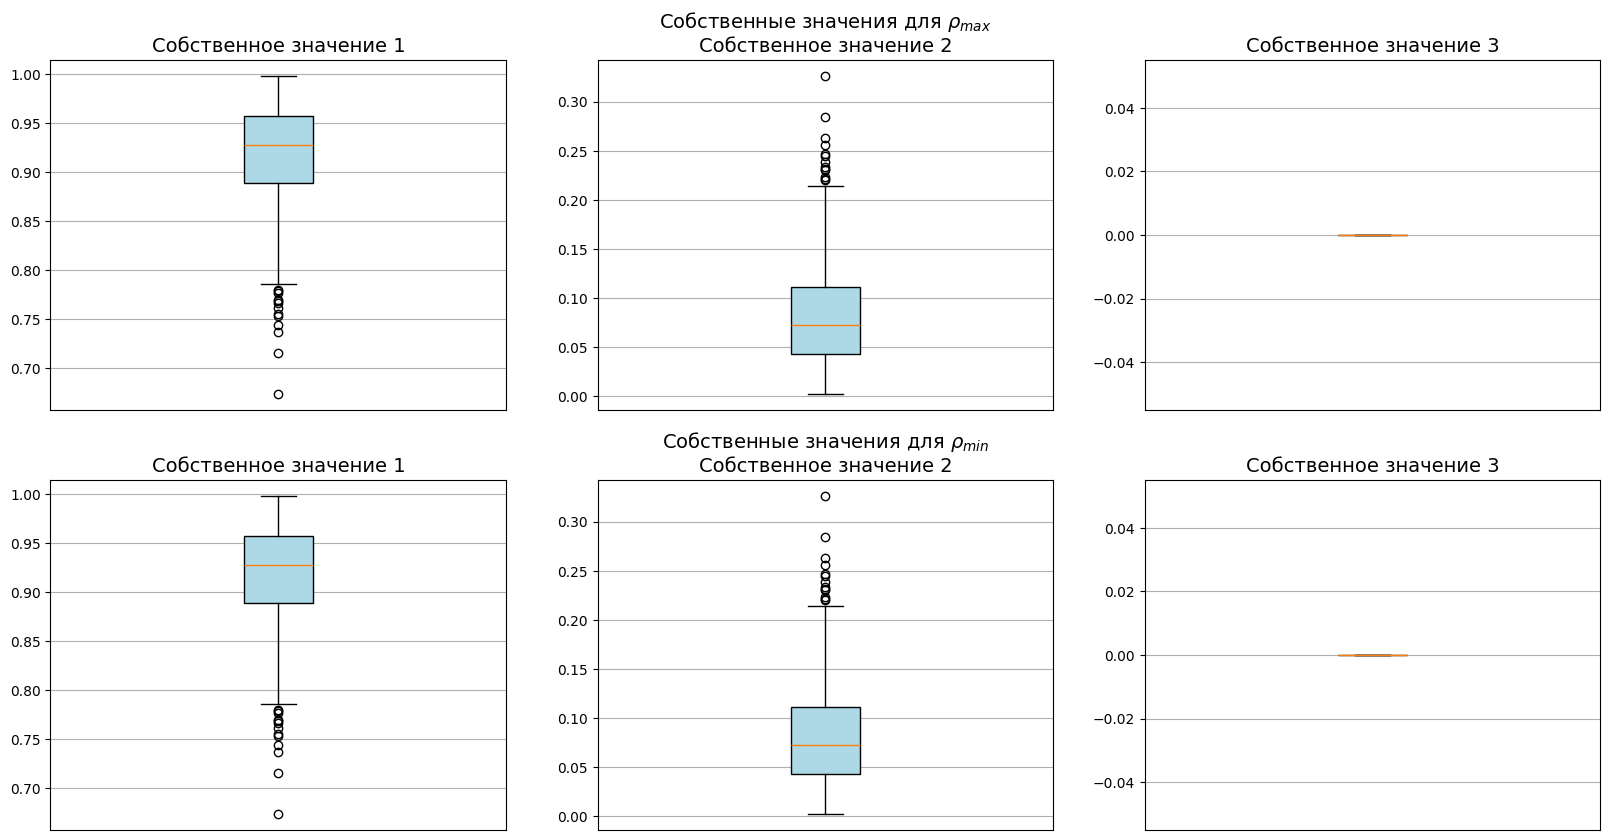

In [126]:
# Группируем колонки по измерениям (столбцы)
column_groups = [
    ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"],  # Измерение 1
    ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"],  # Измерение 2
    ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"],   # Измерение 3
    ["СЗ 1, И 4", "СЗ 2, И 4", "СЗ 3, И 5"],   # Измерение 4
    ["СЗ 1, И 5", "СЗ 2, И 5", "СЗ 3, И 5"]   # Измерение 5
]

col_labels = ["СЗ 1", "СЗ 2", "СЗ 3"]
row_labels = ["Измерение 1", "Измерение 2", "Измерение 3", "Измерение 4", "Измерение 5"]

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

i = 4    # по измерениям (строки)
for j in range(3):  # по СЗ (столбцы)
    ax = axes[0][j]
    col_name = column_groups[i][j]
    data = df_start_protocol_r_2_max[col_name].dropna()
    ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    
    # Заголовок для каждого графика — только название СЗ
    ax.set_title(f"Собственное значение {col_labels[j][3]}", fontsize=14)
    
    # Для центрального графика в строке (j == 1) добавляем подпись с измерением
    if j == 1:
        ax.set_title(r"Собственные значения для $\rho_{max}$" + f"\nСобственное значение {col_labels[j][3]}", fontsize=14)

    ax.grid(True)
    ax.set_xticks([])


for j in range(3):  # по СЗ (столбцы)
    ax = axes[1][j]
    col_name = column_groups[i][j]
    data = df_start_protocol_r_2_min[col_name].dropna()
    ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    
    # Заголовок для каждого графика — только название СЗ
    ax.set_title(f"Собственное значение {col_labels[j][3]}", fontsize=14)
    
    # Для центрального графика в строке (j == 1) добавляем подпись с измерением
    if j == 1:
        ax.set_title(r"Собственные значения для $\rho_{min}$" + f"\nСобственное значение {col_labels[j][3]}", fontsize=14)

    ax.grid(True)
    ax.set_xticks([])


# plt.tight_layout()
plt.show()


Для ранга 3

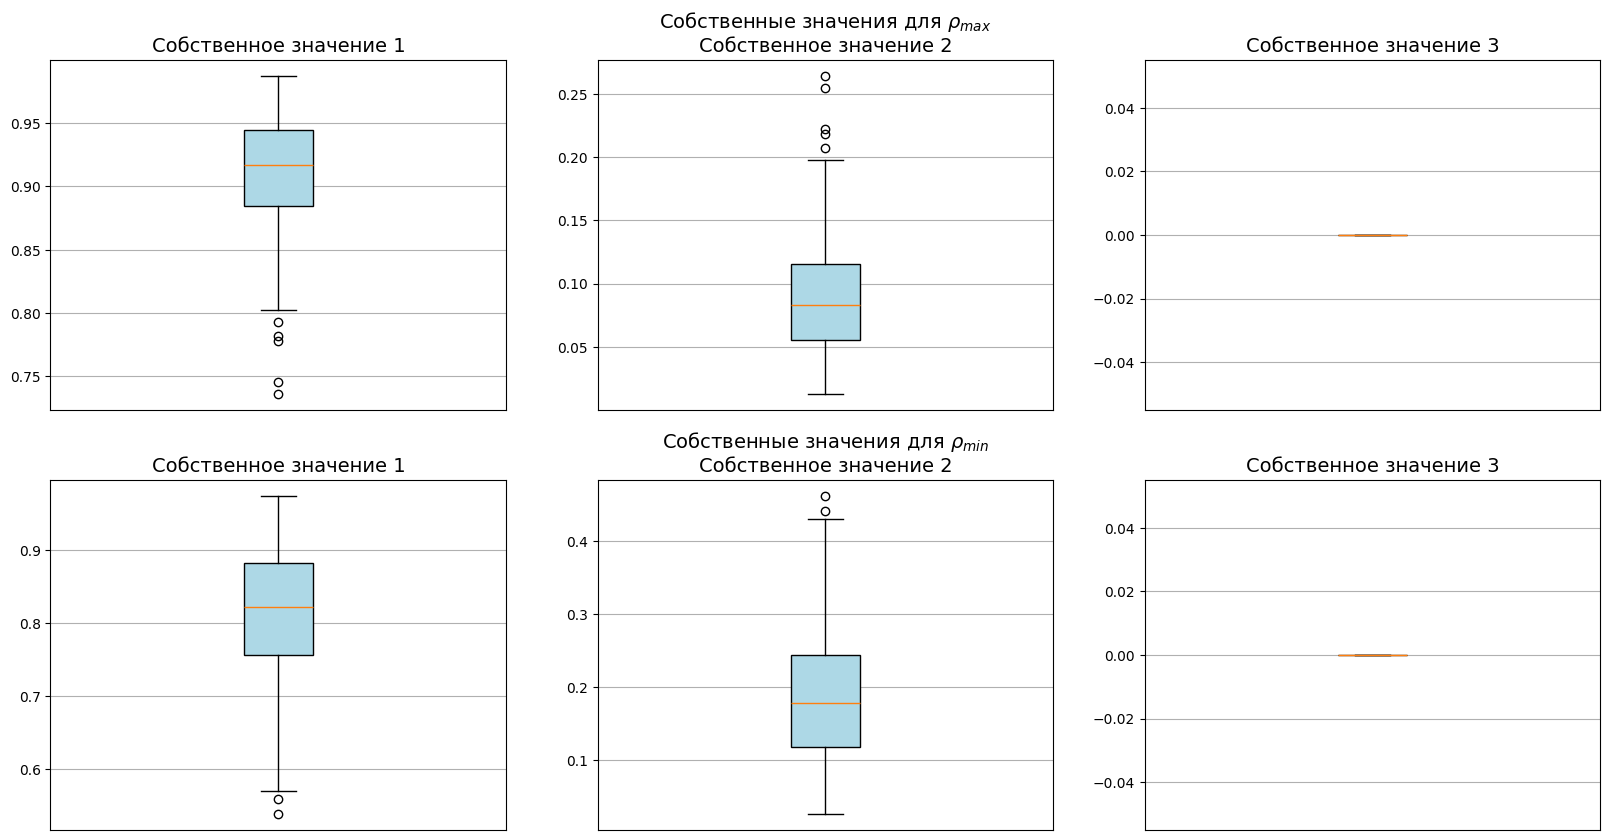

In [97]:
# Группируем колонки по измерениям (столбцы)
column_groups = [
    ["СЗ 1, И 1", "СЗ 2, И 1", "СЗ 3, И 1"],  # Измерение 1
    ["СЗ 1, И 2", "СЗ 2, И 2", "СЗ 3, И 2"],  # Измерение 2
    ["СЗ 1, И 3", "СЗ 2, И 3", "СЗ 3, И 3"],   # Измерение 3
    ["СЗ 1, И 4", "СЗ 2, И 4", "СЗ 3, И 5"],   # Измерение 4
    ["СЗ 1, И 5", "СЗ 2, И 5", "СЗ 3, И 5"]   # Измерение 5
]

col_labels = ["СЗ 1", "СЗ 2", "СЗ 3"]
row_labels = ["Измерение 1", "Измерение 2", "Измерение 3", "Измерение 4", "Измерение 5"]

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

i = 2    # по измерениям (строки)
for j in range(3):  # по СЗ (столбцы)
    ax = axes[0][j]
    col_name = column_groups[i][j]
    data = df_start_protocol_r_3_max[col_name].dropna()
    ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    
    # Заголовок для каждого графика — только название СЗ
    ax.set_title(f"Собственное значение {col_labels[j][3]}", fontsize=14)
    
    # Для центрального графика в строке (j == 1) добавляем подпись с измерением
    if j == 1:
        ax.set_title(r"Собственные значения для $\rho_{max}$" + f"\nСобственное значение {col_labels[j][3]}", fontsize=14)

    ax.grid(True)
    ax.set_xticks([])

for j in range(3):  # по СЗ (столбцы)
    ax = axes[1][j]
    col_name = column_groups[i][j]
    data = df_start_protocol_r_3_min[col_name].dropna()
    ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    
    # Заголовок для каждого графика — только название СЗ
    ax.set_title(f"Собственное значение {col_labels[j][3]}", fontsize=14)
    
    # Для центрального графика в строке (j == 1) добавляем подпись с измерением
    if j == 1:
        ax.set_title(r"Собственные значения для $\rho_{min}$" + f"\nСобственное значение {col_labels[j][3]}", fontsize=14)

    ax.grid(True)
    ax.set_xticks([])

# plt.tight_layout()
plt.show()
